In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('minwage.csv')
df.head()

,sheet,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,hrsopen,psoda,pfry,pentree,nregs,nregs11,type,status,date,special
0,1,1,0,1,0,1,0,0,0,0,...,16.0,0.93,0.83,0.85,4.0,3.0,1.0,1.0,110592.0,0.0
1,1,1,0,1,0,1,0,0,0,0,...,16.0,1.05,0.79,0.90,4.0,3.0,NaN,NaN,NaN,NaN
2,2,1,0,1,0,1,0,0,0,0,...,14.0,1.06,0.91,0.96,2.0,2.0,1.0,1.0,110592.0,1.0
3,2,1,0,1,0,1,0,0,0,0,...,15.0,1.05,1.01,0.94,2.0,2.0,NaN,NaN,NaN,NaN
4,3,2,0,1,0,1,0,0,0,0,...,10.0,1.06,0.95,3.09,5.0,3.0,1.0,1.0,111792.0,0.0


In [3]:
# binary for pre vs post policy change, 0=pre, 1=post
df['pre_post'] = df['period']== 1
df['pre_post'] = df['pre_post'].astype(int)

In [4]:
# burger king
df['bk'] = df['chain']==1
df['bk'] = df['bk'].astype(int)

In [5]:
# kfc
df['kfc'] = df['chain']==2
df['kfc'] = df['kfc'].astype(int)

In [6]:
# roy
df['roy'] = df['chain']==3
df['roy'] = df['roy'].astype(int)

In [7]:
# wendy
df['wendy'] = df['chain']==4
df['wendy'] = df['wendy'].astype(int)

In [8]:
df['nj'] = df['state']==1
df['nj'] = df['nj'].astype(int)

In [9]:
# interaction nj * post
df['post_nj'] = df['nj']*df['pre_post']

In [10]:
model = smf.ols(formula = "empft ~ post_nj + bk + kfc + roy + co_owned + southj + centralj + pa1", data = df).fit()

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  empft   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     7.997
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           2.11e-10
Time:                        19:51:59   Log-Likelihood:                -2803.5
No. Observations:                 802   AIC:                             5625.
Df Residuals:                     793   BIC:                             5667.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2475      0.867     11.813      0.0

In [12]:
# full time equivalent
df['fte'] = df['empft'] + df['nmgrs'] + 0.5 * df['emppt']

In [13]:
model_2 = smf.ols(formula = "fte ~ post_nj + bk + kfc + roy + co_owned + southj + centralj + pa1", data = df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     27.38
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.21e-37
Time:                        19:51:59   Log-Likelihood:                -2809.5
No. Observations:                 794   AIC:                             5637.
Df Residuals:                     785   BIC:                             5679.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7791      0.910     26.137      0.0

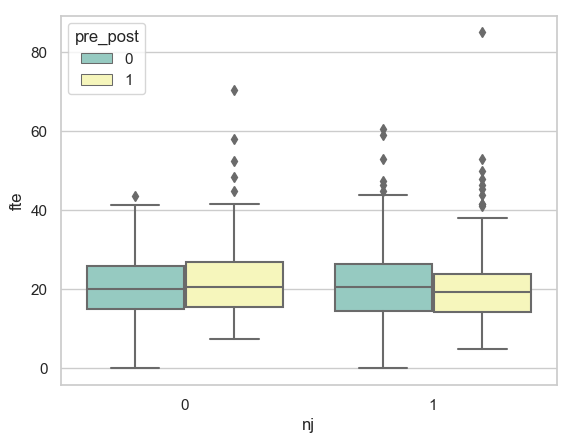

In [14]:
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='nj', y='fte', hue='pre_post',
                 data=df, palette='Set3')
plt.show()

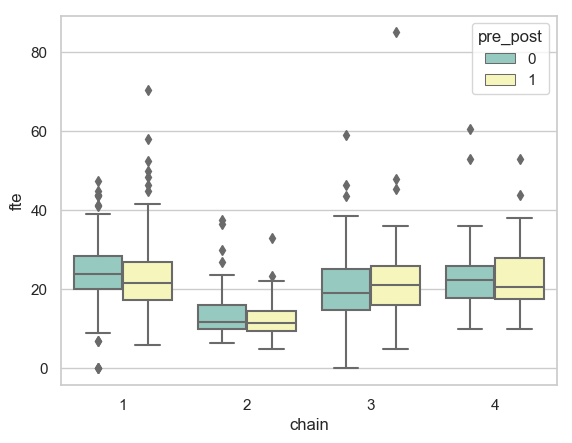

In [15]:
ax = sns.boxplot(x='chain', y='fte', hue='pre_post',
                 data=df, palette='Set3')
plt.show()